In [ ]:
import warnings
warnings.filterwarnings('ignore')

# HTML Refresher
This part is based on chapter 11 of *Automate the Boring Stuff with Python* by Al Sweigart

HTML files are plain text files containing *tags*, which are words enclosed in angle brackets. Tags tell the browser how to format the web page. A starting tag and closing tag can enclose some text to form an element. The text (or inner HTML) is the content between the starting and closing tags.

There are many different tags in HTML. Some of these tags have extra properties in the form of attributes within the angle brackets. For example, the `<a>` tag encloses text that should be a link.

Some elements have an `id` attribute that is used to uniquely identify the element in the page. You will often instruct your programs to seek out an element by its id attribute, so figuring out an element’s id attribute using the browser’s developer tools is a common task in writing web scraping programs.

In [1]:
%%bash
cat << EOF > example.html
<!DOCTYPE html>
<html>
<head>
<title>Hello!</title>
</head>
<body>
<h1>Hello World!</h1>
You are extremely welcome!<br>
<br>
The <a href=\"https://github.com/datsoftlyngby/dat4sem2019spring-python-materials\">Lecture Notes</a>.<br>
<div>
<p>paragraph 1</p>
<p>and paragraph 2: <span id="span01">This is span 1</span id="span02"><span id="span03">Second span element</span>
<span class="red_border">Here is the third span</span>
</p>
</div>
</body>
</html>
EOF

In [2]:
%%bash
xdg-open example.html

# View a Page's HTML Sources

Here, I will only describe how to use Firefox' development features.

To view a page's sources right click on it and choose **View page source** which opens a new tab with the HTML sources.

<img src="images/view_source_small.png" width="500"> 

In Firefox, you can bring up the Web Developer Tools Inspector by pressing `CTRL-SHIFT-C` on Windows and Linux or by `CMD-OPTION-C` on OS X.

<img src="images/inspector_small.png" width="600"> 

# Parsing HTML with BeautifulSoup

BeautifulSoup is a module for parsing and extracting information from HTML sources. The module’s name is bs4. In case it is not already installed on your machine:
- install it with `pip install beautifulsoup4`. While beautifulsoup4 is the name used for installation, 
- to import BeautifulSoup you have to use `import bs4`.

According to its documentation (https://www.crummy.com/software/BeautifulSoup/) *"Beautiful Soup parses anything you give it, and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text.""*

## Creating a BeautifulSoup Object from a Local HTML File

- The `bs4.BeautifulSoup()` function needs to be called with a string containing the HTML it will parse. 
- The `bs4.BeautifulSoup()` function returns is a `BeautifulSoup` object.

You can load a local HTML file and pass a file object to `bs4.BeautifulSoup()`.

In [3]:
import bs4

with open('./example.html') as f:
    example_html = f.read()
    
soup = bs4.BeautifulSoup(example_html)
print(type(soup))
print(soup.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html>
 <head>
  <title>
   Hello!
  </title>
 </head>
 <body>
  <h1>
   Hello World!
  </h1>
  You are extremely welcome!
  <br/>
  <br/>
  The
  <a href='\"https://github.com/datsoftlyngby/dat4sem2019spring-python-materials\"'>
   Lecture Notes
  </a>
  .
  <br/>
  <div>
   <p>
    paragraph 1
   </p>
   <p>
    and paragraph 2:
    <span id="span01">
     This is span 1
    </span>
    <span id="span03">
     Second span element
    </span>
    <span class="red_border">
     Here is the third span
    </span>
   </p>
  </div>
 </body>
</html>



## Creating a BeautifulSoup Object from a Remote HTML File



In [1]:
import bs4
import requests


r = requests.get('https://github.com/datsoftlyngby/dat4sem2020spring-python')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

print(soup.prettify()[:1500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-7b00555b34e27547e4200fc646d0f990.css" integrity="sha512-ewBVWzTidUfkIA/GRtD5kGS5AtVPpm8zpUXbCgMZ6xOI8wSa6QT6psJ9FNdwKsZ+PNVNncnR4YJcxrUlJ+/8LQ==" media="all" rel="stylesheet">
   <link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-db5797d9868460861af755858749976b.css" integrity="sha512-21eX2YaEY

## Finding an Element with the `select()` Method

You can retrieve HTML elements from a `BeautifulSoup` object by calling the `select()` method and passing a string of a CSS selector for the element you are looking for. Selectors are like regular expressions: They specify a pattern to look for, in this case, in HTML pages instead of general text strings.

Common CSS selector patterns include:

  * `soup.select('div')` ... selects all elements named `<div>`
  * `soup.select('#lecturer')`  ... selects the element with an id attribute of author
  * `soup.select('.notice')` ... selects all elements that use a CSS class attribute named notice
  * `soup.select('div span')` ... selects all elements named `<span>` that are within an element named `<div>`
  * `soup.select('div > span')` ... selects all elements named `<span>` that are directly within an element named `<div>`, with no other element in between
  * `soup.select('input[name]')` ... selects all elements named `<input>` that have a name attribute with any value
  * `soup.select('input[type="button"]')` ... selects all elements named `<input>` that have an attribute named type with value button
  
See more in the documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors

In [13]:
import bs4


with open('./example.html') as f:
    example_html = f.read()

soup = bs4.BeautifulSoup(example_html, 'html.parser')

elems = soup.select('body')

#print(soup.prettify())
print('1: return type of select()',type(elems))
print('2: length of the returned list',len(elems))
print('3: type of elements in the list',type(elems[0]))
print('4: get text from the element',elems[0].getText()[:40])
print('5: string representation of an element: ',str(elems[0]))
print('6: the attributes of the element: ',elems[0].attrs)

1: return type of select() <class 'list'>
2: length of the returned list 1
3: type of elements in the list <class 'bs4.element.Tag'>
4: get text from the element 
Hello World!
You are extremely welcome!
5: string representation of an element:  <body id="html_body">
<h1>Hello World!</h1>
You are extremely welcome!<br/>
<br/>
The <a href='\"https://github.com/datsoftlyngby/dat4sem2019spring-python-materials\"'>Lecture Notes</a>.<br/>
<div>
<p>paragraph 1</p>
<p>and paragraph 2: <span id="span01">This is span 1</span><span id="span03">Second span element</span>
<span class="red_border">Here is the third span</span>
</p>
</div>
</body>
6: the attributes of the element:  {'id': 'html_body'}


In [14]:
p_elems = soup.select('p')

for el in p_elems:
    print(str(el))
    print(el.getText())
    print('------------')

<p>paragraph 1</p>
paragraph 1
------------
<p>and paragraph 2: <span id="span01">This is span 1</span><span id="span03">Second span element</span>
<span class="red_border">Here is the third span</span>
</p>
and paragraph 2: This is span 1Second span element
Here is the third span

------------


## Getting Data from an Element’s Attributes

The `get()` method for Tag objects makes it simple to access attribute values from an element. The method is passed a string of an attribute name and returns that attribute’s value.

In [18]:
{'id': 'lecturer'}.get('id')

'lecturer'

In [4]:
import bs4

with open('./example.html') as f:
    example_html = f.read()
    
soup = bs4.BeautifulSoup(example_html, 'html.parser')
# soup.find_all?
span_elem = soup.select('span')[0]
print(str(span_elem))
print(span_elem.get('id'))
print(span_elem.get('some_nonexistent_addr') == None)
print(span_elem.attrs)

<span id="span01">This is span 1</span>
span01
True
{'id': 'span01'}


### What is the difference between the `select` and the `find`/`find_all` functions?

You are not the first ones wondering about this... See:
https://stackoverflow.com/questions/38028384/beautifulsoup-is-there-a-difference-between-find-and-select-python-3-x#38033910

# Example Scraping Events from a Page


Ususally, you will use web scraping to collect information, which you cannot gather otherwise. 
For example, let's imagine we want to do some statistics about:
- concerts in Copenhagen, 
- their start times and 
- their door prices.

Since we cannot find an API or any other open dataset, we decide to scrape the publicly available homepage www.kultunaut.dk, 

The website lists all possible events in Denmark. 
Concerts in Copenhagen are for example accessible here: 
- http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik

**OBS** Many web pages are not built to support high traffic or they exlicitely discourage automatic access. Keep this in mind when writing your scraping tool.
- from time import sleep
- sleep(3) # sleep 3 seconds


Considering our example:
- we have to first figure out how many events there are at all. 
- We need this information, as events are given paginated, i.e., twenty events per page.
- The link given above only returns the link to the first page with the first twenty events. 
- Out of the total amount of events we can generate the URLs for the subsequent results.

In [22]:
r = requests.get('http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('td', attrs={'style': 'background-color:#CBDCEE;color:#324669'})[0]
b_el = elems.find('b')
print(b_el)

<b>Showing 1-20 of 1365
events  in Cph. and Frederiksberg <span style="white-space: nowrap;"> from/after 9 Mar 2020</span> </b>


In [23]:
# extract from text (the hard way)

import bs4
import requests


r = requests.get('http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik')
r.raise_for_status
soup = bs4.BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('td', {'style': 'background-color:#CBDCEE;color:#324669'})
el0 = elems[0]

fifth = str(el0).split(' ')[5]
print(fifth)
number = int(str(fifth.split('\n')[0]))
#print(el0)
#print(fifth)
print(number)

1365
events
1365


### Looking at the browser inspector pane:

<img src="images/inspect_element.png" width="500">

We can see that the desired element is hiding in a structure like: a b-tag inside a h3-tag inside a td-tag or:
- `('td h3 b')`

In [21]:
# use select with css-selectors rather than find_all
import bs4
import requests
html = requests.get('http://www.kultunaut.dk/perl/arrlist/type-nynaut?Area=&ArrStartday=22&ArrStartmonth=Marts&ArrStartyear=2020&ArrSlutday=29&ArrSlutmonth=Marts&ArrSlutyear=2020&ArrMaalgruppe=&DefaultGenre=Musik&ArrKunstner=')
txt = html.text
soup = bs4.BeautifulSoup(txt, 'html.parser')
events = soup.select('td h3 b')
print('number of events is {}'.format(len(events)))
for e in events:
    print(e.getText())

number of events is 20
Jane og Shane - søndagsmatine.
Giant Steps i Børnehøjde m/Carl Quist-Møller & Thomas Sandberg Rytmevæsenet.
Sankt Petri Menighed 445 år.
Søndage med Jazz i Pakhuset.
Loppemarked.
Matiné i kirken.
Matiné-koncert.
Menighedsplejens årsmøde.
Koncert.
Jazz Cafe med "Amanda J / Rikke".
Erik Satie konkurrence for unge musikere og sangere.
Plademarked.
Maries Festival Band - Store ørehængere.
Koncert med Jeannet Ulrikkeholm.
Koncert.
Haletudserne.
Søndagsjazz - RiverJazz & Blues Band - Dronning Louises Jazzklub.
Hyldestkoncert til Benny Andersen.
Cantarellerne giver koncert i Karlebo Kirke.
Alsang i domkirken.


In [24]:
# Get all the links in a document
import requests
from bs4 import BeautifulSoup
gov = requests.get('https://analytics.usa.gov')
soup = BeautifulSoup(gov.text, 'lxml')
print(soup.prettify()[:100])
print('------------------------')
for link in soup.find_all('a'):
    print(link.get('href'))

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--

------------------------
/
#explanation
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/all-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov/issues
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
http://www.gsa.gov/
https://www.digitalgov.gov/services/dap/
https://

In [9]:
# using elems.text to get a string from the bs4.element.Tag object
r = requests.get('http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?showmap=&Area=Kbh.+og+Frederiksberg&periode=&Genre=Musik')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('td', attrs={'style': 'background-color:#CBDCEE;color:#324669'})[0].find('b')
print(elems.text, type(elems.text), type(elems))
no_events = elems.text.split(' ')[3].split('\r\n')[0]
no_events = int(no_events)
print('Events: ',no_events)

Showing 1-20 of 1379
events  in Cph. and Frederiksberg  from/after 8 Mar 2020  <class 'str'> <class 'bs4.element.Tag'>
Events:  1379


Now, we can scrape the events per page. Observe, that now, out `base_url` http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?Startnr={}&showmap=&Area=Kbh.%20og%20Frederiksberg&periode=&Genre=Musik& has a placeholder for the paginated results (`Startnr=`).

Consequently, we scrape each page separately, see the function on the next slide: `scrape_events_per_page`. From examining the page's source code, we know that events are all given as table entries with a corresponding header. We iterate over each of the table cells and extract the strings for dates and prices if they exist.

In [25]:
from tqdm import tqdm

    
def scrape_events_per_page(url):
    """
    returns:
        A list of tuples of strings holding title, place, date, and price
        for concerts in Copenhagen scraped from Kulturnaut.dk
    """
    r = requests.get(url)
    r.raise_for_status()

    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    event_cells = soup.find_all('td', {'align' : 'top'})
    #print('size',len(event_cells))
    scraped_events_per_page = []
    
    for event_cell in event_cells:
        try:
            title = event_cell.find('b').text
            spans = event_cell.find_all('span')
            place = spans[3].text
            try:
                date, price = spans[0].text.splitlines()
            except ValueError as e:
                date = spans[0].text.splitlines()[0]
                price = ''
        except Exception as e:
            print(e)
            
        scraped_events_per_page.append((title, place, date, price))
        
    return scraped_events_per_page


base_url = 'http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?Startnr={}&showmap=&Area=Kbh.%20og%20Frederiksberg&periode=&Genre=Musik&'

scraped_events = []
indexes = list(range(1, no_events, 20))
indexes[0] = 0

for idx in tqdm(indexes):
    scrape_url = base_url.format(idx)
    #print(scrape_url)
    scraped_events += scrape_events_per_page(scrape_url)

100%|██████████| 69/69 [00:55<00:00,  1.25it/s]


In [27]:
result = scrape_events_per_page('http://www.kultunaut.dk/perl/arrlist/type-nynaut/UK?Startnr=1200&showmap=&Area=Kbh.%20og%20Frederiksberg&periode=&Genre=Musik&')
result

[('Københavns Kammerkor øver.',
  'Davidskirken, Koldinggade 11, Copenhagen Ø',
  'Monday 12 October 2020, 6 pm.',
  ''),
 ('Åben kirke.',
  'Mariakirken, Istedgade 20, Copenhagen V',
  'Tuesday 15 October 2020, 7 pm.',
  ''),
 ('Arena (UK).',
  'Beta, Øresundsvej 6, Copenhagen S',
  'Friday 16 October 2020, 8 pm.',
  '(Entrance fee)'),
 ('Sweet og Slade dobbeltkoncert.',
  'Docken København, Nordhavnen, Færgehavnsvej 35, Nordhavn',
  'Friday 16 October 2020, 8 pm.',
  '(Entrance fee)'),
 ('Beethoven festival.',
  'Ansgarkirken, Mågevej 33, Copenhagen NV',
  'Monday 12 October 2020 to Friday 16 October 2020, 7.30 pm.',
  '(Free admission)'),
 ("Gilbert O'Sullivan.",
  'Docken København, Nordhavnen, Færgehavnsvej 35, Nordhavn',
  'Saturday 17 October 2020, 8 pm.',
  '(Entrance fee)'),
 ('Clawfinger (SE).',
  'Amager Bio, Øresundsvej 6, Copenhagen S',
  'Saturday 17 October 2020, 9 pm.',
  '(Entrance fee)'),
 ('Barok-koncert.',
  'Godthaabskirken, Nyelandsvej 51A, Frederiksberg',
  'Sund

### What do we have so far?

Now, you can see that we extracted a list of four element string tuples consisting of the title of the event, its location, a date and a time, and an entrance fee.

In [28]:
scraped_events[:20]

[('The Marcus King Band (us) - Udsolgt.',
  'VEGA, Enghavevej 40, Copenhagen V',
  'Monday 9 March 2020, 8 pm.',
  '(Entrance fee: 225 DKK)'),
 ('Ginne Marker.',
  'Jazzhus Montmartre, Store Regnegade 19A, Copenhagen K',
  'Monday 9 March 2020, 8 pm.',
  '(Entrance fee: 110 DKK + evt. gebyr)'),
 ('Med på Noderne.',
  'Drop Inn, Kompagnistræde 34, Copenhagen K',
  'Monday 9 March 2020, 8 pm.',
  '(Free admission)'),
 ('Princess nokia (US).',
  'Pumpehuset, Studiestræde 52, Copenhagen V',
  'Monday 9 March 2020, 8 pm.',
  '(Entrance fee: 290 DKK)'),
 ('Baby lydplaneter.',
  'Osramhuset, Valhalsgade 4, Copenhagen N',
  'Tuesday 10 March 2020, 12 am.',
  '(Entrance fee: 50 DKK + Gebyr)'),
 ('Stemme og Chakra Frekvenser: Solar plexus.',
  'Metronomen, Godthåbsvej 33, Frederiksberg',
  'Tuesday 10 March 2020, 7 pm.',
  '(Entrance fee: 50 DKK)'),
 ('Dr Pigekorets Forår Udsolgt.',
  'Holmens Kirkegård, Dag Hammarskjölds Allé 35, Copenhagen Ø',
  'Tuesday 10 March 2020, 7.30 pm.',
  '(Entrance 

## Exercise with beautifulSoup
Use BeautifulSoup to extract all titles on all radio programs https://www.dr.dk/radio/programmer
1. First find how many pages there are
2. Then find all titles on https://www.dr.dk/radio/programmer?side=1
3. Then find all titles on all pages


### How to Extract Dates and Prices from Strings.

Remember, the raw data, which we extracted from the web pages is all of type `str`. To do statistics about possible correlation of start times and entry fees, we need to convert the corresponding tuple fields into datetimes and integers respectively.


Since dates given on the web do not necessarily conform to standardized time formats, we can apply the `dateparser` (https://pypi.python.org/pypi/dateparser) module, which tries to parse arbitrary strings into datetimes.

You can install the module via:

```bash
pip install dateparser
```

You can read more about the module and its capabilities https://dateparser.readthedocs.io/en/latest/.

In [61]:
%%bash
#pip install dateparser

In [93]:
from tqdm import tqdm
import re
from dateparser import parse


def get_dates_and_prices(scraped_events):
    """
    Cleanup the data. Get price as integer and date as date.
    
    returns:
        A two-element tuple with a datetime representing the start 
        time of an event and an integer representing the price in Dkk.
    """

    price_regexp = r"(?P<price>\d+)" #initial ? is a lookbehind. r() r is for raw text, P<some pattern> is to give a pattern name to refer to. \d is numeric digit, + is for 1 or more.

    data_points = []
    three_at_night = datetime.now().replace(hour=3, minute=0, second=0, microsecond=0).time()
    for event_data in tqdm(scraped_events):
        title_str, place_str, date_str, price_str = event_data
        
        if 'Free admission' in price_str:
            price = 0
        else:
            m = re.search(price_regexp, price_str) # m is the Match object returned from re.search (might be None)
            try:
                price = int(m.group('price')) # if price can be converted to int then we do it else return 0.
            except:
                price = 0

        date_str = date_str.strip().strip('.')
        if '&' in date_str:
            date_str = date_str.split('&')[0]
        if '-' in date_str:
            date_str = date_str.split('-')[0]
        if '.' in date_str:
            date_str = date_str.replace('.', ':')
        
        date = parse(date_str)
        if date and date.time() > three_at_night:
            data_points.append((date, price))
            
    return data_points


dates_and_prices = get_dates_and_prices(scraped_events)


100%|██████████| 1514/1514 [00:50<00:00, 30.14it/s]


In [64]:
dates_and_prices[10:20]

[(datetime.datetime(2020, 1, 24, 19, 30), 130),
 (datetime.datetime(2020, 1, 24, 19, 30), 400),
 (datetime.datetime(2020, 1, 24, 19, 30), 0),
 (datetime.datetime(2020, 1, 24, 20, 0), 100),
 (datetime.datetime(2020, 1, 24, 20, 0), 225),
 (datetime.datetime(2020, 1, 24, 20, 0), 0),
 (datetime.datetime(2020, 1, 24, 20, 30), 170),
 (datetime.datetime(2020, 1, 24, 21, 0), 0),
 (datetime.datetime(2020, 1, 24, 21, 0), 70),
 (datetime.datetime(2020, 1, 24, 21, 0), 120)]

### Plotting Times vs. Prices

[datetime.time(7, 30), datetime.time(17, 0), datetime.time(18, 0), datetime.time(19, 30), datetime.time(20, 0), datetime.time(20, 0), datetime.time(15, 30), datetime.time(16, 30), datetime.time(18, 0), datetime.time(18, 0)]


<IPython.core.display.Javascript object>


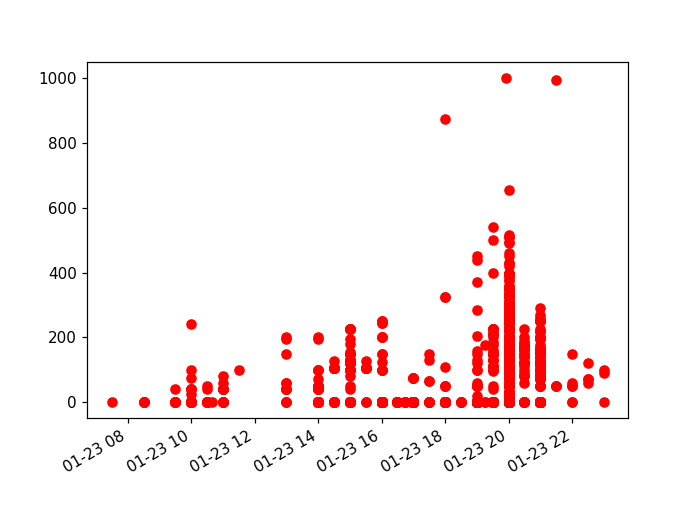

In [94]:
%matplotlib notebook 
from datetime import datetime
import matplotlib.pyplot as plt


dates, prices = zip(*dates_and_prices) # See zip example with * here: https://www.programiz.com/python-programming/online-compiler/?ref=2390fcb4"
print([d.time() for d in dates][:10])
ref_day = datetime.today()
times = [datetime.combine(ref_day, t.time()) for t in dates] # get the time intervals for today

# plot
plt.plot(times, prices, 'ro')
#plt.plot(dates, prices, 'ro')
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

### The Pearson Correlation Coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets. Like other correlation coefficients, this one varies between -1 and +1
with 0 implying no correlation. Correlations of -1 or +1 imply an exact
linear relationship. Positive correlations imply that as x increases, so
does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

In [95]:
import matplotlib
from scipy.stats.stats import pearsonr


x, y = zip(*dates_and_prices)
x = matplotlib.dates.date2num(x)

pearsonr(x, y)

(-0.17679229321634257, 1.4160407547246473e-11)

Consequently, since our Pearson Correlation Coefficient is quite close to zero, there is likely no correlation between the start time of a concert and the price you have to pay for it.

# Class exercise: Scraping Images from a Page

In the following code you will use Beautiful Soup to extract all links to images, which are in `img` tags on a web page.

In [79]:
import bs4
import os
import sys
import requests
import shutil


def collect_img_links(url):
    """based on a url returns a list of image links contained in the requested page"""
    r = requests.get(url)
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    #print(soup.select('img'))
    return [img.get('src') for img in soup.select('img') 
            if img.get('src') and img.get('src').startswith('http')]


def download_imgs(links, out_folder="./test/"):
    """download all images from a list of image links. 
    Requires a folder named: test to be there"""
    img_no = 0
    for l in links:
        img_no += 1
        r = requests.get(l, stream=True)
        with open(out_folder+'img'+str(img_no)+'.jpg', 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)     
        
links = collect_img_links('https://www.google.dk/search?site=&tbm=isch&source=hp&biw=1163&bih=812&q=minions&oq=minions')
links
download_imgs(links)

# Exercise 2: Writing a Simple Web Crawler

Write a simple web crawler. More precisely, a program that extracts recursively all links from web pages. The result of running the web crawler is a dictionary, were the key-value pairs correspond to outgoiung links from a web page with the URL, which is stored in the key.


In case a page returns a status code, which is not `200` we just disregard this page. See https://en.wikipedia.org/wiki/List_of_HTTP_status_codes for more detailes on the various HTTP status codes.

In [77]:
def scrape_links(from_url, for_depth, all_links={}):
    # This is what the exercise below asks you to implement!
    pass


start_url = 'https://www.version2.dk/artikel/google-deepmind-vi-oeger-sikkerheden-mod-misbrug-sundhedsdata-1074452'

link_dict = scrape_links(from_url=start_url, for_depth=2)

The web crawler that you wrote above is perhaps not the most performant. If you are interested in more web scraping and application of crawlers have a look at the `scrapy` module (https://scrapy.org)